# Model Building
**Aim**: To develop a machine learning model for the required task.


---


# Importing Dependancies

In [1]:
!pip install -q shap

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors 
import pickle
import seaborn as sns
import shap

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix, plot_confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [3]:
import warnings
warnings.filterwarnings("ignore")

# Model 1: Stochastic Gradient Descent Classifier

In [4]:
with open ("NITRRData.pkl", "rb") as f:
    data=pickle.load(f)

In [5]:
x = data["features"]
y = data["target"]

In [6]:
x = scale(x)
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.3,random_state = 1)

In [7]:
sgdc = SGDClassifier(max_iter=100, tol=0.001)
print(sgdc)

SGDClassifier(max_iter=100)


In [8]:
sgdc.fit(xtrain, ytrain)

SGDClassifier(max_iter=100)

In [9]:
ypred = sgdc.predict(xtest)

In [10]:
print("Accuracy:", accuracy_score(ytest, ypred))

Accuracy: 0.841025641025641


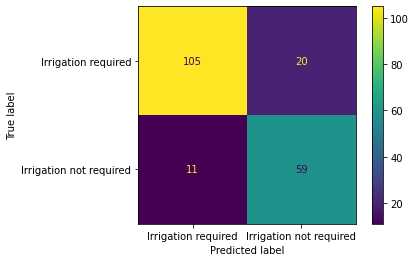

In [11]:
plot_confusion_matrix(sgdc, xtest, ytest,display_labels=['Irrigation required','Irrigation not required'])

# Model 2: Support Vector Machine

In [12]:
with open('/NITRRData.pkl','rb') as d:
    data = pickle.load(d)

In [13]:
feature_matrix = data['features']
df=pd.DataFrame(feature_matrix)

In [14]:
label_vector = data['target']
df1 = pd.DataFrame(label_vector)
target_df = df1

In [15]:
data_df = pd.get_dummies(df,columns=['CropType'])

data_df.head()

,CropDays,SoilMoisture,Temperature,Humidity,CropType_1,CropType_2,CropType_3,CropType_4,CropType_5,CropType_6,CropType_7,CropType_8,CropType_9
63,16,230,28,71,1,0,0,0,0,0,0,0,0
93,74,600,23,15,1,0,0,0,0,0,0,0,0
92,70,990,24,19,1,0,0,0,0,0,0,0,0
91,66,700,25,17,1,0,0,0,0,0,0,0,0
90,65,660,23,15,1,0,0,0,0,0,0,0,0


In [16]:
X_train, X_test, y_train, y_test = train_test_split(data_df,target_df,random_state = 42)

In [17]:
svm = SVC(random_state = 1)
svm.fit(X_train, y_train.values.ravel())

SVC(random_state=1)

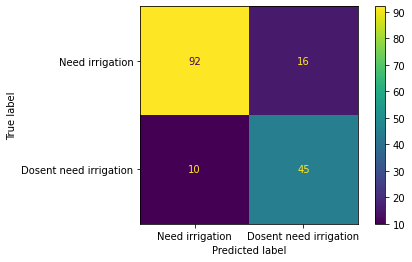

In [18]:
plot_confusion_matrix(svm,
                     X_test,
                     y_test.values.ravel(),
                     values_format= 'd',
                     display_labels=['Need irrigation','Dosent need irrigation'])

### Hyperparameter Tuning

In [19]:
param_grid = [
    { 'C': [0.5, 1, 5, 10, 15, 100],
    'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']}
]


optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv = 10,
    scoring = 'accuracy'
)

optimal_params.fit(X_train, y_train.values.ravel())
print(optimal_params.best_params_)

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}


In [20]:
optimised_svm = SVC(random_state = 42, C=100 , gamma=0.0001, kernel = 'rbf')
optimised_svm.fit(X_train, y_train.values.ravel())

SVC(C=100, gamma=0.0001, random_state=42)

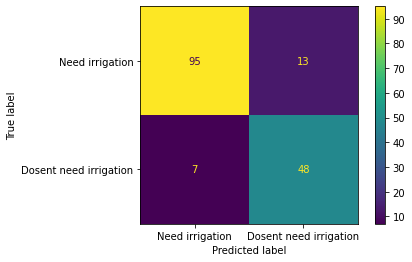

In [21]:
plot_confusion_matrix(optimised_svm,
                     X_test,
                     y_test.values.ravel(),
                     values_format= 'd',
                     display_labels=['Need irrigation','Dosent need irrigation'])

In [22]:
y_pred = svm.predict(X_test)
print("Accuracy Score of the model:", accuracy_score(y_test, y_pred))

Accuracy Score of the model: 0.8404907975460123


In [23]:
with open('NITRRData.pkl','rb') as d:
    data = pickle.load(d)

In [24]:
feature_matrix = data['features']
df=pd.DataFrame(feature_matrix)

In [25]:
label_vector = data['target']
df1 = pd.DataFrame(label_vector)
target_df = df1

In [26]:
data_df = pd.get_dummies(df,columns=['CropType'])

data_df.head()

,CropDays,SoilMoisture,Temperature,Humidity,CropType_1,CropType_2,CropType_3,CropType_4,CropType_5,CropType_6,CropType_7,CropType_8,CropType_9
63,16,230,28,71,1,0,0,0,0,0,0,0,0
93,74,600,23,15,1,0,0,0,0,0,0,0,0
92,70,990,24,19,1,0,0,0,0,0,0,0,0
91,66,700,25,17,1,0,0,0,0,0,0,0,0
90,65,660,23,15,1,0,0,0,0,0,0,0,0


In [27]:
X_train, X_test, y_train, y_test = train_test_split(data_df,target_df,random_state = 42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [28]:
svm = SVC(random_state = 1)
svm.fit(X_train_scaled, y_train.values.ravel())

SVC(random_state=1)

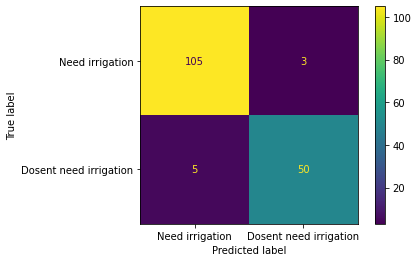

In [29]:
plot_confusion_matrix(svm,
                     X_test_scaled,
                     y_test.values.ravel(),
                     values_format= 'd',
                     display_labels=['Need irrigation','Dosent need irrigation'])

In [30]:
param_grid = [
    { 'C': [0.5, 1, 5, 10, 15, 100],
    'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']}
]


optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv = 10,
    scoring = 'accuracy'
)

optimal_params.fit(X_train_scaled, y_train.values.ravel())
print(optimal_params.best_params_)

{'C': 5, 'gamma': 0.1, 'kernel': 'rbf'}


In [31]:
optimised_svm = SVC(random_state = 42, C=100 , gamma='scale')
optimised_svm.fit(X_train_scaled, y_train.values.ravel())

SVC(C=100, random_state=42)

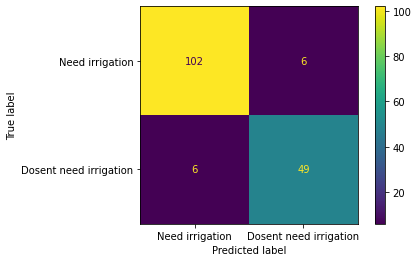

In [32]:
plot_confusion_matrix(optimised_svm,
                     X_test_scaled,
                     y_test.values.ravel(),
                     values_format= 'd',
                     display_labels=['Need irrigation','Dosent need irrigation'])

In [33]:
y_pred = svm.predict(X_test)
print("Accuracy Score of the model:", accuracy_score(y_test, y_pred))

Accuracy Score of the model: 0.6625766871165644


# Model 3: K-Nearest Neighours

In [34]:
RANDOM_STATE = 1

In [35]:
data = pickle.load(open("NITRRData.pkl", "rb"))
X = data["features"]
y = data["target"]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = RANDOM_STATE)

In [37]:
print("Training Feature Matrix shape:", X_train.shape)
print("Training Label Vector shape:", y_train.shape)

print("Testing Feature Matrix shape:", X_test.shape)
print("Testing Label Vector shape:", y_test.shape)

Training Feature Matrix shape: (520, 5)
Training Label Vector shape: (520,)
Testing Feature Matrix shape: (130, 5)
Testing Label Vector shape: (130,)


### Hyperparameter Tuning

In [38]:
knn_model = Pipeline([
    ("scale", StandardScaler()),
    ("knn", KNeighborsClassifier())
    ])

param_grid = {"knn__n_neighbors":[1, 2, 3, 4]}
gscv = GridSearchCV(knn_model, param_grid = param_grid)
gscv.fit(X_train, y_train)
gscv.best_params_

{'knn__n_neighbors': 3}

In [39]:
model = Pipeline([
    ("scale", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors = 3))
    ])

model.fit(X_train, y_train)


Pipeline(steps=[('scale', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

In [40]:
model.classes_

array([0, 1])

In [41]:
y_pred = model.predict(X_test)
print("Accuracy Score of the model:", accuracy_score(y_test, y_pred))

Accuracy Score of the model: 0.9307692307692308


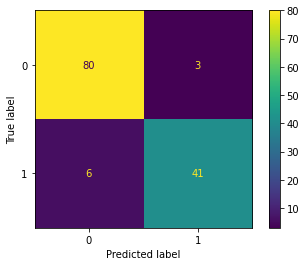

In [42]:
plot_confusion_matrix(model, X_test, y_test)
plt.show()

# Model 4: Decision Tree Classifier

In [43]:
with open('NITRRData.pkl','rb') as d:
    data = pickle.load(d)

In [44]:
feature_matrix = data['features']
df=pd.DataFrame(feature_matrix)

In [45]:
label_vector = data['target']
df1 = pd.DataFrame(label_vector)

target_df = df1

In [46]:
X=df
y=df1

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

### Hyperparameter Tuning

In [48]:
params_dist={
    "criterion":["gini","entropy"],
    "splitter":["best","random"],
    'max_depth':[x for x in range(1,13)]
}

clf = DecisionTreeClassifier(random_state=1)

grid=GridSearchCV(clf,param_grid=params_dist,cv=10,n_jobs=-1)

grid.fit(X_train,y_train)
grid.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'splitter': 'best'}

In [49]:
grid.best_score_

0.923076923076923

In [50]:
NeedIrii_classifier= DecisionTreeClassifier(criterion = "entropy", max_depth=8,random_state=1)
NeedIrii_classifier.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)

In [51]:
NeedIrii_classifier.score(X_test,y_test)


0.9384615384615385

In [52]:
y_pred=NeedIrii_classifier.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0])

In [53]:
print("Accuracy Score of the model:", accuracy_score(y_test,y_pred))

Accuracy Score of the model: 0.9384615384615385


In [54]:
cf = confusion_matrix(y_test,y_pred)

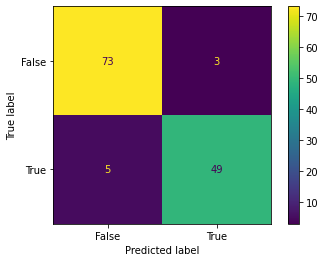

In [55]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cf, display_labels = [False, True])
cm_display.plot()
plt.show()

# Model 5: Random Forest Classifier

In [56]:
data = pickle.load(open("/NITRRData.pkl", "rb"))
X = data["features"]
y = data["target"]

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = RANDOM_STATE)

In [58]:
print("Training Feature Matrix shape:", X_train.shape)
print("Training Label Vector shape:", y_train.shape)

print("Testing Feature Matrix shape:", X_test.shape)
print("Testing Label Vector shape:", y_test.shape)

Training Feature Matrix shape: (520, 5)
Training Label Vector shape: (520,)
Testing Feature Matrix shape: (130, 5)
Testing Label Vector shape: (130,)


### Hyperparameter Tuning

In [59]:
rf_model = Pipeline([
    ("scale", StandardScaler()),
    ("rf", RandomForestClassifier(max_depth = 1000))
    ])

param_grid = {"rf__criterion":["gini", "entropy", "log_loss"]}
gscv = GridSearchCV(rf_model, param_grid = param_grid)
gscv.fit(X_train, y_train)
gscv.best_params_

{'rf__criterion': 'entropy'}

In [60]:
model = Pipeline([
    ("scale", StandardScaler()),
    ("rf", RandomForestClassifier(max_depth = 1000, criterion = "gini"))
    ])
model.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('rf', RandomForestClassifier(max_depth=1000))])

In [61]:
y_pred = model.predict(X_test)
print("Accuracy Score of the model:", accuracy_score(y_test, y_pred))

Accuracy Score of the model: 0.9538461538461539


# Adaboost Classifier

In [62]:
with open ("NITRRData.pkl", "rb") as f:
    data=pickle.load(f)

In [63]:
x = data["features"]
y = data["target"]

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 1)
x_train= x_train
x_test = x_test

### Hyperparameter Tuning

In [65]:

svc = SVC(probability=True, random_state = 1)
dtc = DecisionTreeClassifier(max_depth=8,random_state=0)
rfc = RandomForestClassifier(max_depth = 1000, criterion = "gini")

abc_model = Pipeline([
    ("scale", StandardScaler()),
    ("abc", AdaBoostClassifier(n_estimators=100))
])

param_grid = {"abc__base_estimator": [dtc, rfc, svc], 
              "abc__learning_rate": [1, 0.1, 0.01, 0.5, 0.05]
}

gscv = GridSearchCV(abc_model, param_grid = param_grid)
gscv.fit(x_train, y_train)
gscv.best_params_

{'abc__base_estimator': RandomForestClassifier(max_depth=1000),
 'abc__learning_rate': 1}

In [66]:
model = Pipeline([
    ("scale", StandardScaler()),
    ("abc", AdaBoostClassifier(n_estimators=100, base_estimator = rfc, learning_rate = 0.01))
])
model.fit(x_train, y_train.values.ravel())

y_pred = model.predict(x_test)


print("Accuracy of the model:", accuracy_score(y_test, y_pred))

Accuracy of the model: 0.9179487179487179


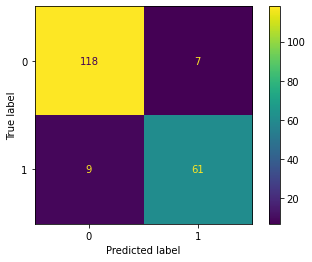

In [67]:
plot_confusion_matrix(model, x_test, y_test.values.ravel())

# Finalized Model

### Global Variables

In [68]:
RANDOM_STATE = 1

### Loading the Data

In [69]:
data = pickle.load(open("/NITRRData.pkl", "rb"))
X = data["features"]
y = data["target"]

### Splitting the Data to Train and Test Sets:

Training Data: 80%
Testing Data: 20%

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = RANDOM_STATE)

### Sanity Check

In [71]:
print("Training Feature Matrix shape:", X_train.shape)
print("Training Label Vector shape:", y_train.shape)

print("Testing Feature Matrix shape:", X_test.shape)
print("Testing Label Vector shape:", y_test.shape)

Training Feature Matrix shape: (520, 5)
Training Label Vector shape: (520,)
Testing Feature Matrix shape: (130, 5)
Testing Label Vector shape: (130,)


### Hyperparameter Tuning

In [72]:
rf_model = Pipeline([
    ("scale", StandardScaler()),
    ("rf", RandomForestClassifier(max_depth = 1000))
    ])

param_grid = {"rf__criterion":["gini", "entropy"]}
gscv = GridSearchCV(rf_model, param_grid = param_grid)
gscv.fit(X_train, y_train)
gscv.best_params_

{'rf__criterion': 'entropy'}

### Setting up the model

In [73]:
model = Pipeline([
    ("scale", StandardScaler()),
    ("rf", RandomForestClassifier(max_depth = 100, criterion = "gini"))
    ])
model.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('rf', RandomForestClassifier(max_depth=100))])

### Model Accuracy Score

In [74]:
y_pred = model.predict(X_test)
print("Accuracy Score of the model:", accuracy_score(y_test, y_pred))

Accuracy Score of the model: 0.9461538461538461


### Shap for displaying insights for model output

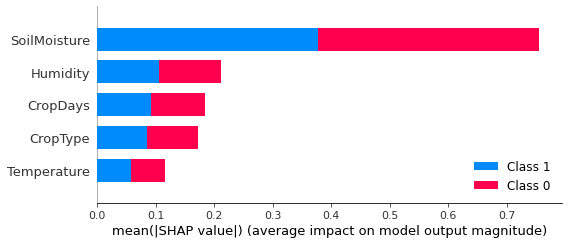

In [75]:
explainer = shap.TreeExplainer(model["rf"])
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

### Eporting the model

In [76]:
with open('rf_model.h5', "wb") as modelfile:
  pickle.dump(model, modelfile) 